<a href="https://colab.research.google.com/github/ManishaKhatri808/Pizza-Price-prediction/blob/main/Pizza_price_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/pizza_v1.csv')

In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [ ]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [ ]:
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


# Data preprocessing part-I

In [ ]:
df['price_rupiah']=df['price_rupiah'].str.replace('Rp','').str.replace(',','')

In [ ]:
df.dtypes

company          object
price_rupiah     object
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

In [ ]:
df['price_rupiah']=df['price_rupiah'].astype(int)

In [ ]:
df.dtypes

company          object
price_rupiah      int64
diameter        float64
topping          object
variant          object
size             object
extra_sauce      object
extra_cheese     object
dtype: object

In [ ]:
df['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

# Segmenting variant column for categorizing pizza types

In [ ]:
def segment_variant(variant):
  if 'meat' in variant or 'BBQ' in variant:
    return 'meat';
  elif 'veggie' in variant:
    return 'vegeterian'
  elif 'tuna' in variant:
    return 'seafood'
  else:
    return 'others'

In [ ]:
df['variant']=df['variant'].apply(segment_variant)

In [ ]:
df['variant']

0       others
1       others
2       others
3       others
4       others
        ...   
124    seafood
125    seafood
126    seafood
127       meat
128       meat
Name: variant, Length: 129, dtype: object

<Axes: >

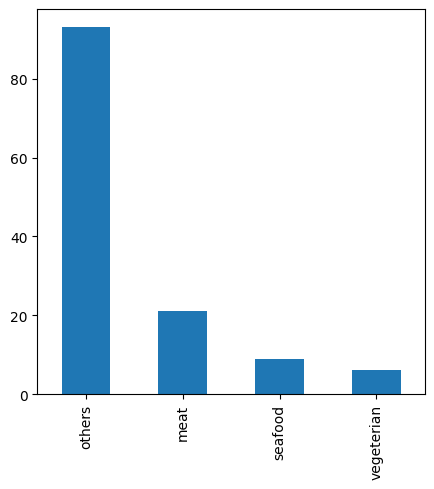

In [ ]:
plt.figure(figsize=(5,5))
df['variant'].value_counts().plot(kind='bar')

#Exploratory Data analysis

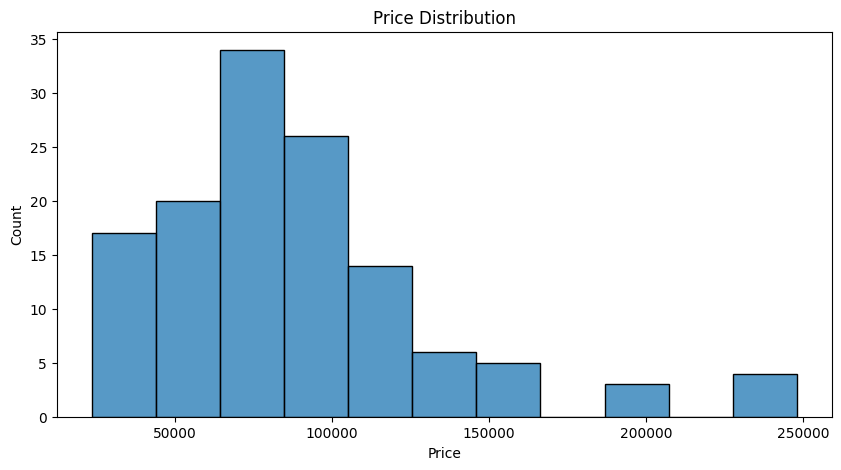

Mean 87151.16279069768
Mode 72000
Min 23500
Max 248000


In [ ]:
plt.figure(figsize=(10,5))
plt.title('Price Distribution')
ax=sns.histplot(x='price_rupiah',data=df)
ax.set(xlabel='Price',ylabel='Count')
plt.show()

print('Mean',df['price_rupiah'].mean())
print('Mode',df['price_rupiah'].mode()[0])
print('Min',df['price_rupiah'].min())
print('Max',df['price_rupiah'].max())

In [ ]:
#Although the cost of a pizza can range from 23500 to 24800 rupiahs, the majority of them cost between 23500 and 150000.
#Pizza costs an average of 87151 rupiah, and the most popular price for a pizza is 72000 rupiah.

<Axes: title={'center': 'Number of pizza orders for each company'}, xlabel='company', ylabel='price_rupiah'>

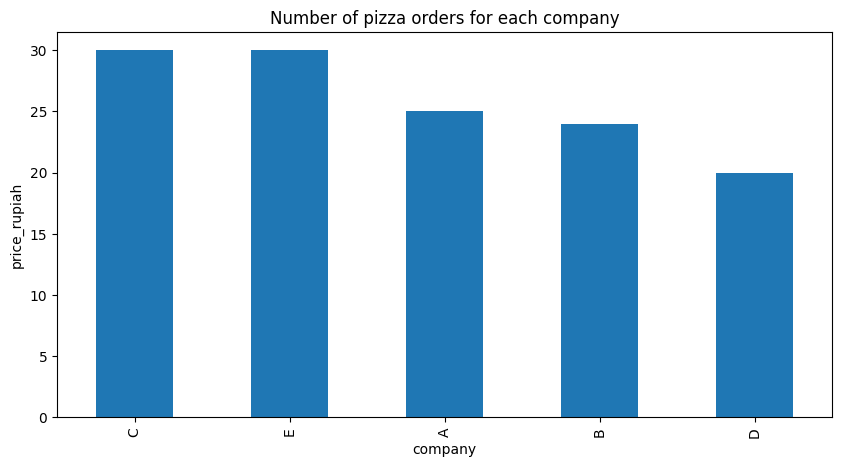

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Number of pizza orders for each company")
plt.xlabel('company')
plt.ylabel('price_rupiah')
df['company'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Average price of the pizza order for each company')

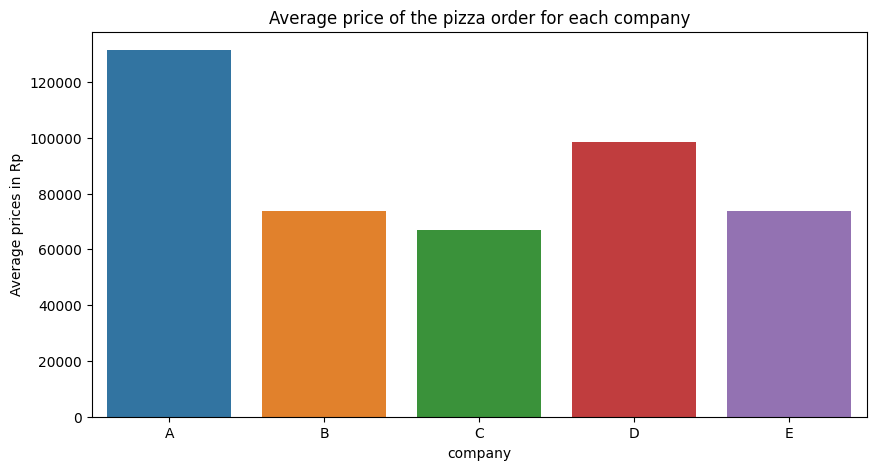

In [ ]:
avg_prices={}
unique_company=df['company'].unique()
for company in unique_company:
  avg_prices[company]=df[df['company']==company]['price_rupiah'].mean()
plt.figure(figsize=(10,5))
ax1=sns.barplot(x=list(avg_prices.keys()),y=list(avg_prices.values()),data=df)
ax1.set(xlabel='company',ylabel='Average prices in Rp')
ax1.set_title("Average price of the pizza order for each company")

In [ ]:
#It is concluded that company 'C' and 'E' has highest order for pizza while "D" has the least amount of orders
#average price of company for comapny 'A' is highest and 'C' is lowest
#although company 'A' is the most expensive pizza but order for pizza is not lowest so we assume that price is not the only factor to order

In [ ]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,others,jumbo,yes,yes
1,A,198000,20.0,papperoni,others,jumbo,yes,yes
2,A,120000,16.0,mushrooms,others,reguler,yes,yes
3,A,155000,14.0,smoked beef,others,reguler,yes,no
4,A,248000,18.0,mozzarella,others,jumbo,yes,no


<Axes: title={'center': 'Diameter v/s Price'}, xlabel='diameter', ylabel='price_rupiah'>

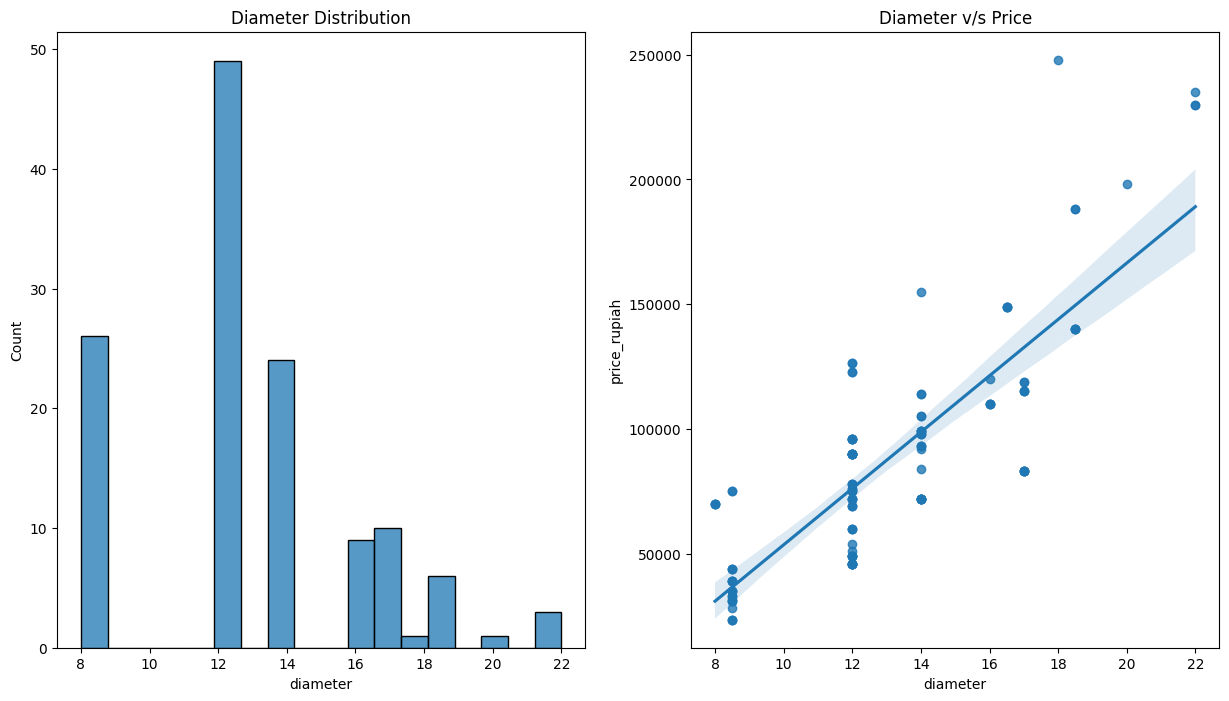

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.set_title('Diameter Distribution')
sns.histplot(x='diameter',data=df,ax=ax1)
ax2.set_title('Diameter v/s Price')
sns.regplot(x=df['diameter'],y=df['price_rupiah'],ax=ax2)

In [ ]:
#we concluded that diameters generally show positive correlations to the prices of pizza but there are other factors that greatly affect the price

Text(0.5, 1.0, 'Variants')

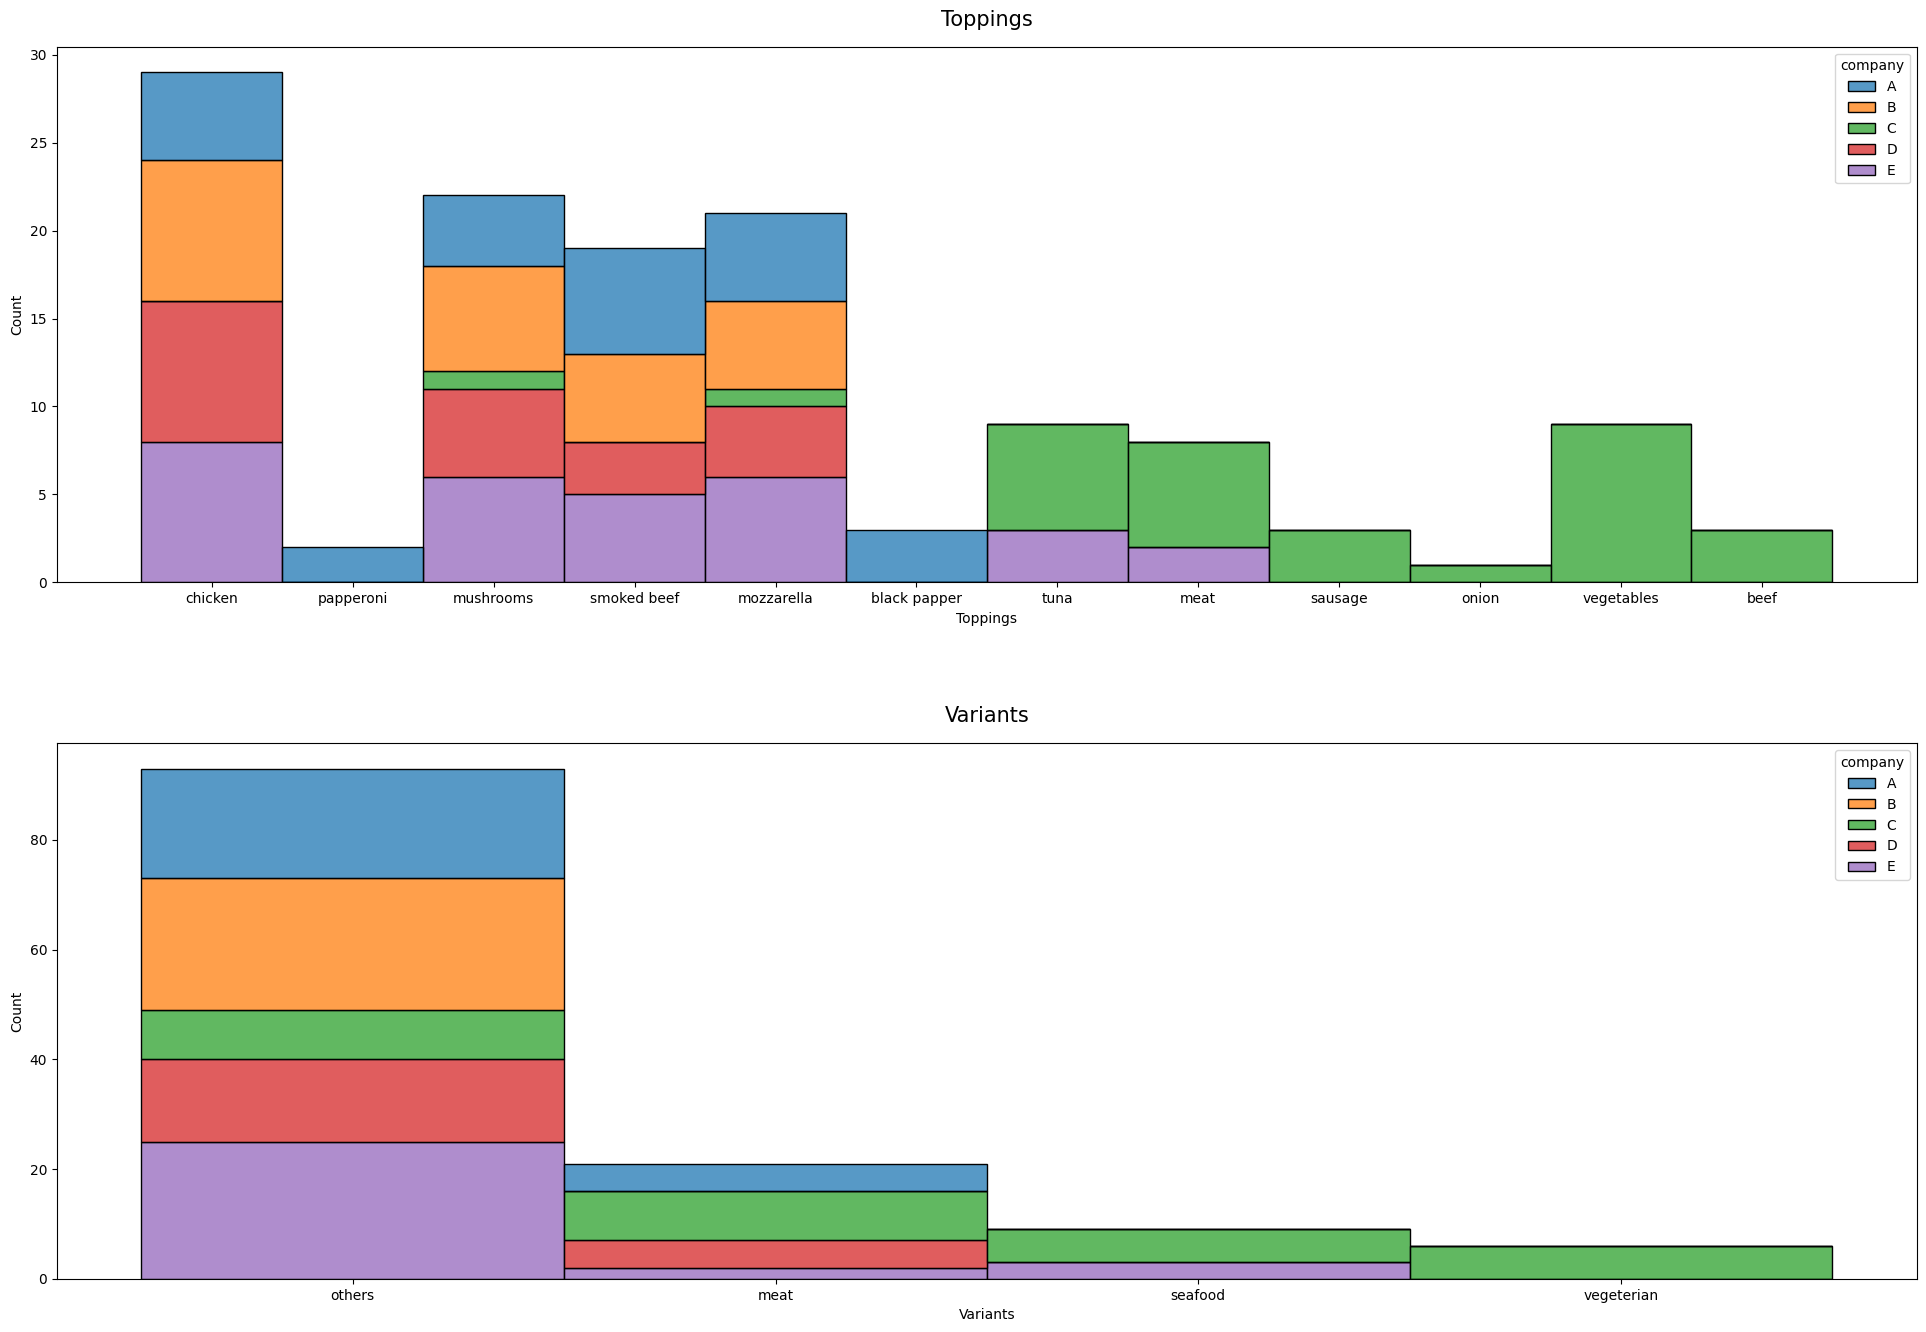

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 16))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# topping
sns.histplot(x='topping', hue='company', data=df, multiple='stack', ax=ax1)
ax1.set(xlabel="Toppings", ylabel="Count")
ax1.set_title("Toppings", fontsize=15, pad=15)


# variants
sns.histplot(x='variant', hue='company', data=df, multiple='stack', ax=ax2)
ax2.set(xlabel="Variants", ylabel="Count")
ax2.set_title("Variants", fontsize=15, pad=15)

In [ ]:
#There are too many small subsets so clustering them in bigger groups

In [ ]:
group_topping = {
    'beef': ['smoked_beef','beef'],
    'other_meat': ['meat','sausage','papperoni'],
    'vegetables': ['vegetables','onion']
}

group_variant = {
    'meat_lovers': ['meat_lovers','meat_eater'],
    'double': ['double_mix','double_decker','double_signature'],
    'BBQ': ['BBQ_meat_fiesta','BBQ_sausage'],
    'extra': ['super_supreme','extravaganza'],
    'veggie': ['thai_veggie','italian_veggie'],
    'american': ['american_classic','american_favorite'],
    'tuna': ['neptune_tuna','spicy tuna','spicy_tuna']
}
for key, value in group_topping.items():
    df['topping'] = df['topping'].apply(lambda x: key if x in value else x)
for key,value in group_variant.items():
  df['variant']=df['variant'].apply(lambda x : key if x in value else x)


Text(0.5, 1.0, 'Variants')

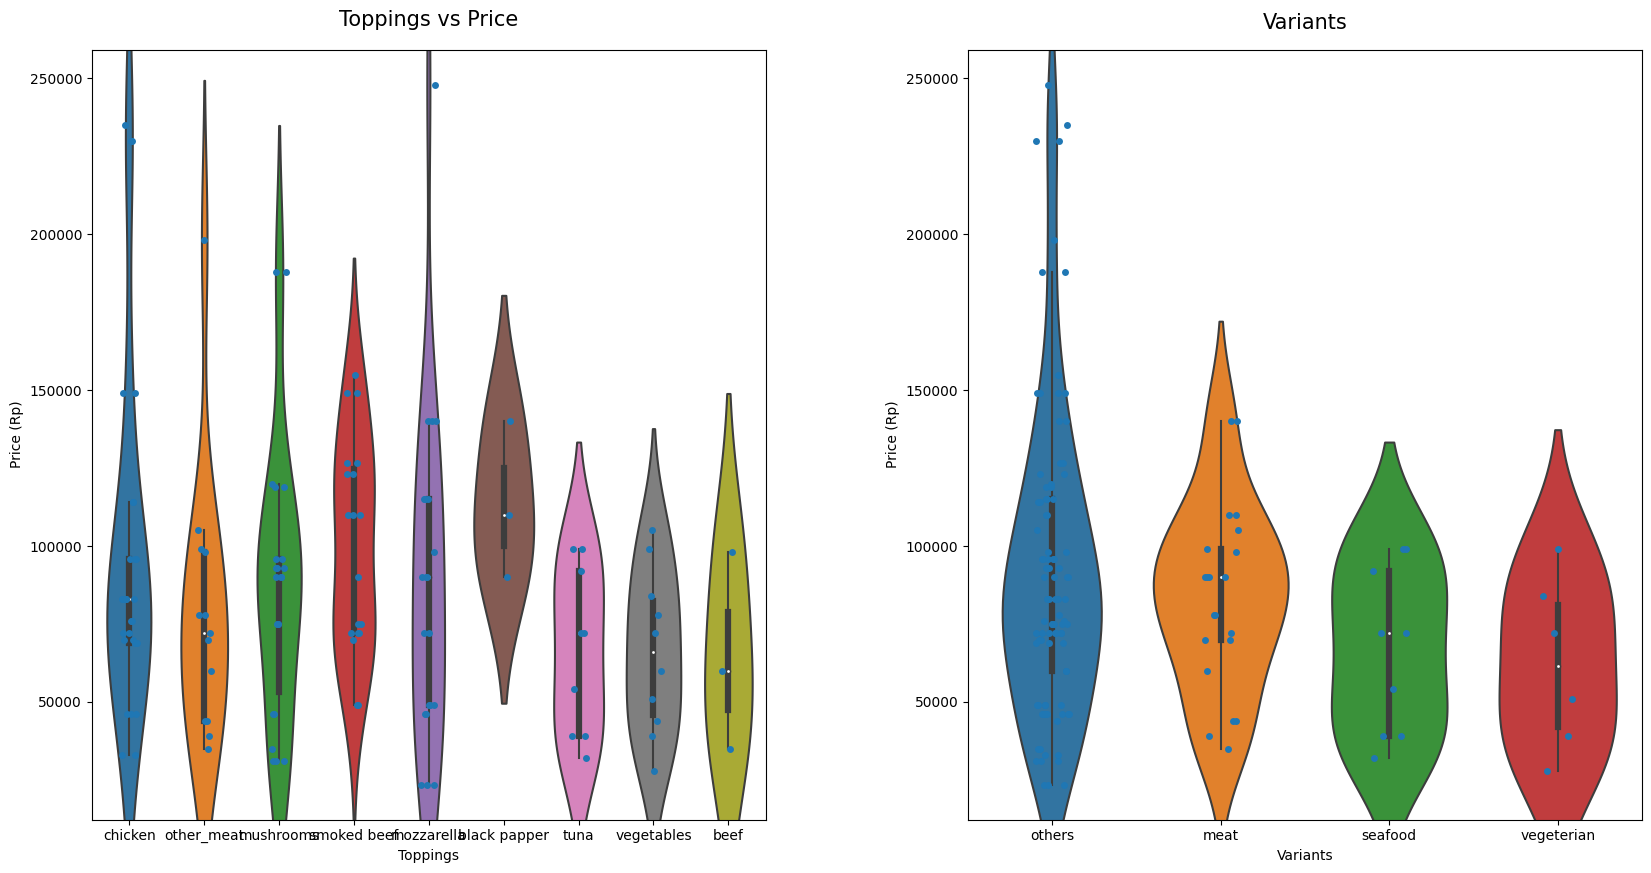

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# topping
sns.violinplot(x="topping", y="price_rupiah", data=df, ax=ax1)
sns.stripplot(x="topping", y="price_rupiah", data=df, ax=ax1)
ax1.set(xlabel="Toppings", ylabel="Price (Rp)")
ax1.set_title("Toppings vs Price", fontsize=15,pad=17)

# variants
sns.violinplot(x="variant", y="price_rupiah", data=df, ax=ax2)
sns.stripplot(x="variant", y="price_rupiah", data=df, ax=ax2)
ax2.set(xlabel="Variants", ylabel="Price (Rp)")
ax2.set_title("Variants", fontsize=15, pad=15)

In [ ]:
#As it is concluded that based on toppin there is not much changes in price but variants has influence on price 

In [ ]:
df


,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,others,jumbo,yes,yes
1,A,198000,20.0,other_meat,others,jumbo,yes,yes
2,A,120000,16.0,mushrooms,others,reguler,yes,yes
3,A,155000,14.0,smoked beef,others,reguler,yes,no
4,A,248000,18.0,mozzarella,others,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,39000,8.5,tuna,seafood,small,yes,yes
125,E,72000,12.0,tuna,seafood,medium,yes,yes
126,E,99000,14.0,tuna,seafood,large,yes,yes
127,E,44000,8.5,other_meat,meat,small,yes,no


Text(0.5, 1.0, 'Extra Cheese vs Price')

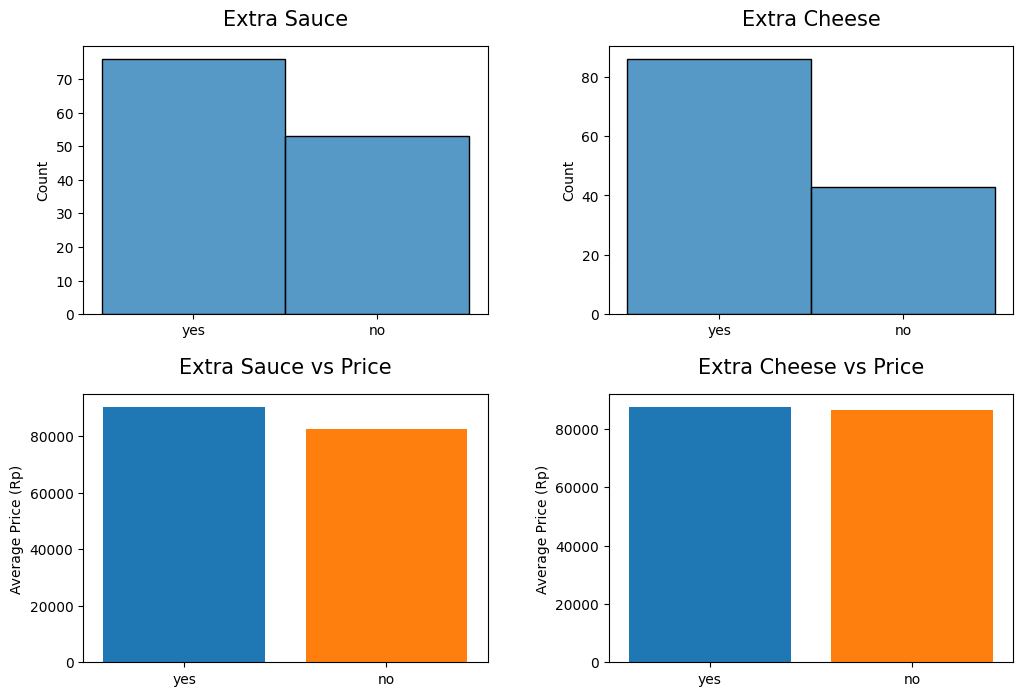

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# extra sauce
sns.histplot(x='extra_sauce', data=df, ax=ax[0][0])
ax[0][0].set(xlabel="", ylabel="Count")
ax[0][0].set_title("Extra Sauce", fontsize=15, pad=15)

# extra cheese
sns.histplot(x="extra_cheese", data=df, ax=ax[0][1])
ax[0][1].set(xlabel="", ylabel="Count")
ax[0][1].set_title("Extra Cheese", fontsize=15, pad=15)

# sauce vs price
x1 = df['extra_sauce'].unique()
y1 = [df[df['extra_sauce']==x1[0]]['price_rupiah'].mean(), df[df['extra_sauce']==x1[1]]['price_rupiah'].mean()]
sns.barplot(x=x1, y=y1, saturation=1, ax=ax[1][0])
ax[1][0].set(xlabel="", ylabel="Average Price (Rp)")
ax[1][0].set_title("Extra Sauce vs Price", fontsize=15, pad=15)

# cheese vs price
x2 = df['extra_cheese'].unique()
y2 = [df[df['extra_cheese']==x2[0]]['price_rupiah'].mean(), df[df['extra_cheese']==x2[1]]['price_rupiah'].mean()]
sns.barplot(x=x2, y=y2, saturation=1, ax=ax[1][1])
ax[1][1].set(xlabel="", ylabel="Average Price (Rp)")
ax[1][1].set_title("Extra Cheese vs Price", fontsize=15, pad=15)

In [ ]:
#It is concluded that adding extra sauce and cheese is more preferred and there is little influence on the average prices 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
  le=LabelEncoder()  
  le.fit(df[col].unique())
  df[col] = le.transform(df[col])

In [ ]:
x=df.drop(['price_rupiah'],axis=1)
y=df['price_rupiah']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

XGBoost


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
xg=XGBRegressor(n_estimators=1000, learning_rate=0.04)
xg.fit(x_train,y_train)
xgb_pred=xg.predict(x_test)

print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("RMSE", mean_squared_error(y_test, xgb_pred, squared=False))
print('accuracy:',r2_score(y_test,xgb_pred))

MAE: 15825.765024038461
RMSE 24601.989165091807
accuracy: 0.6791319591942323


# Random *Forest*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=0)
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)

# calculate metrics
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE", mean_squared_error(y_test, rf_preds, squared=False))
print("R2:", r2_score(y_test, rf_preds))

MAE: 16844.05100732601
RMSE 24553.62216683347
R2: 0.6803923587850649


# feature importance

Text(0.5, 1.0, 'RandomForest')

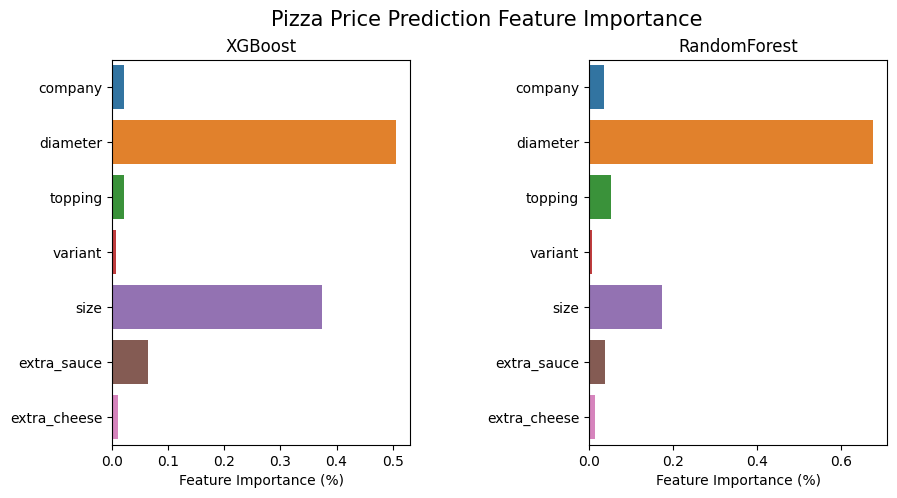

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.3, wspace=0.6)
plt.suptitle("Pizza Price Prediction Feature Importance", fontsize=15)

# xgb
sns.barplot(x=xg.feature_importances_, y=xg.feature_names_in_, ax=ax1)
ax1.set(xlabel="Feature Importance (%)")
ax1.set_title("XGBoost")

# rf
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_, ax=ax2)
ax2.set(xlabel="Feature Importance (%)")
ax2.set_title("RandomForest")

In [ ]:
#For both algorithm diameter is most importance feature